In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Sentence Embeddings/')

In [ ]:
os.listdir()

['.DS_Store',
 'Untitled0.ipynb',
 'covid_dataset_with_ids',
 'Untitled1.ipynb',
 'dataset_final_with_uid',
 'new_preprocessed_covid_dataset',
 'new_preprocessed_dataset_final',
 'text_preprocessing.ipynb',
 'sar_sent_covid_dataset',
 'sar_sent_dataset_final',
 'USE SE 512',
 'BERT SE 128',
 'samp_train_tsne.csv',
 'samp_test_tsne.csv',
 'small_bert_bert_en_uncased_L-12_H-128_A-2_1',
 'samp_test_bert_tsne',
 'samp_train_bert_tsne.csv',
 'use_sarcasm.png',
 'use_sentiment.png',
 'samp_test_bert.csv',
 'samp_train_bert.csv']

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Sentence Embeddings/SAMPLES/ELECTRA/samp_train_elec_embed.csv")
df1 = pd.read_csv("/content/drive/MyDrive/Sentence Embeddings/SAMPLES/ELECTRA/samp_test_elec_embed.csv")

In [ ]:
type(df.BERT_embed[0])

str

In [ ]:
import json
df['BERT_embed'] = df['BERT_embed'].apply(lambda x: json.loads(x))
df1['BERT_embed'] = df1['BERT_embed'].apply(lambda x: json.loads(x))

In [ ]:
import numpy as np
# num = np.asarray(df.iloc[0]['USE_embed']).reshape(1,512)

In [ ]:
num = np.asarray(df.iloc[0]['USE_embed']).reshape(1,512)
for i in range(1,len(df)):
  num = np.concatenate((num,np.asarray(df.iloc[i]['USE_embed']).reshape(1,512)),axis = 0)

In [ ]:
df['array'] = df.BERT_embed.apply(lambda x: np.array(x))
df1['array'] = df1.BERT_embed.apply(lambda x: np.array(x))

In [ ]:
mat = np.matrix([x for x in df.array])
mat1 = np.matrix([x for x in df1.array])

In [ ]:
mat.shape

(448, 256)

In [ ]:
mat1.shape

(461, 256)

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data_train = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data_train.shape)

low_dim_data_test = model.fit_transform(mat1)
print('Lower dim data has shape',low_dim_data_test.shape)

Lower dim data has shape (448, 2)
Lower dim data has shape (461, 2)


In [ ]:
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)
import matplotlib.pyplot as plt1

In [ ]:
pd.unique(df['sarcasm'])

array(['normal', 'sarcasm'], dtype=object)

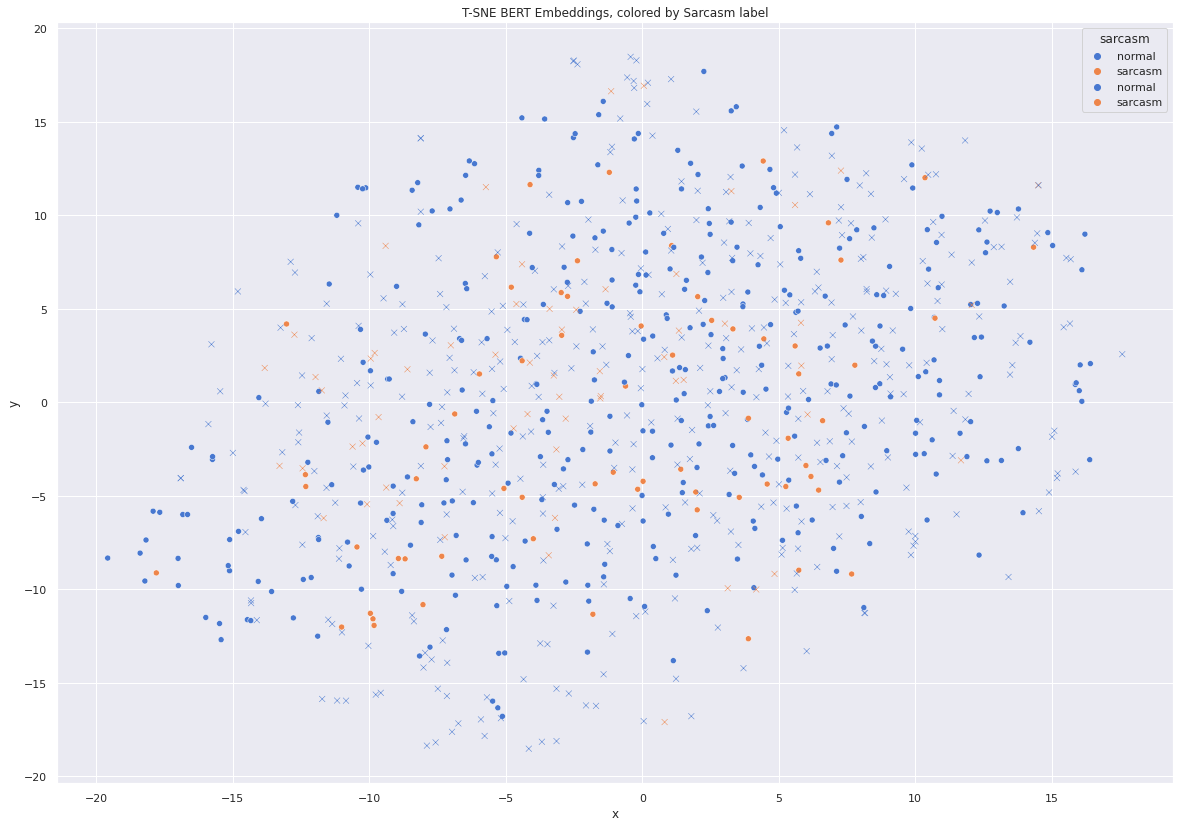

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data_train, df.sarcasm.replace({1:'sarcasm',0:'normal'}))
tsne_df_test_sarc = pd.DataFrame(low_dim_data_test, df1.sarcasm.replace({1:'sarcasm',0:'normal'}))
tsne_df.columns = ['x','y']
tsne_df_test_sarc.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y',hue=tsne_df.index)
ax1 = sns.scatterplot(data=tsne_df_test_sarc, x='x', y='y',marker='x',hue=tsne_df_test_sarc.index)
ax1.set_title('T-SNE BERT Embeddings, colored by Sarcasm label')
plt1.savefig("bert_sarcasm")

In [ ]:
tsne_df.reset_index(inplace = True)

In [ ]:
colors = {'sarcasm':'blue','normal':'red'}
tsne_df['color'] = tsne_df['sarcasm'].apply(lambda x: colors[x])

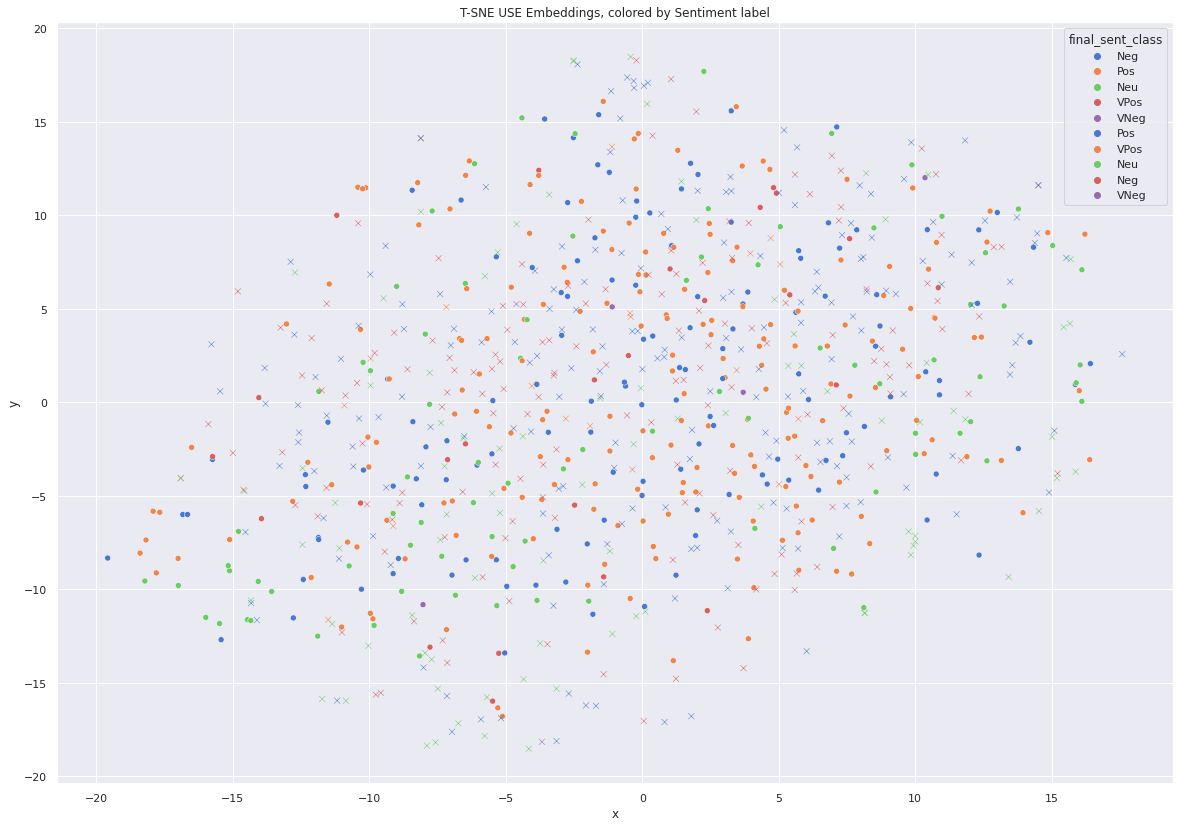

In [ ]:
tsne_df1 =  pd.DataFrame(low_dim_data_train, df.final_sent_class.replace({0:'VNeg',1:'Neg',2:'Neu',3:'Pos',4:'VPos'}))
tsne_df1_test =  pd.DataFrame(low_dim_data_test, df1.final_sent_class.replace({0:'VNeg',1:'Neg',2:'Neu',3:'Pos',4:'VPos'}))
tsne_df1.columns = ['x','y']
tsne_df1_test.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df1, x='x', y='y', hue=tsne_df1.index)
ax1 = sns.scatterplot(data=tsne_df1_test, x='x', y='y',marker = 'x', hue=tsne_df1_test.index)
# ax.set_title('T-SNE USE Embeddings, colored by Sentiment label')
ax1.set_title('T-SNE USE Embeddings, colored by Sentiment label')
plt1.savefig("use_sentiment")